In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
data = "../data/datos_act5.xlsx"
data = pd.read_excel(data)
data

,Frecuencia (mHz),Amplitud (mV),Periodo (s),error Amplitud (mV),error Periodo (s)
0,700,148,1.44,1,0.01
1,720,156,1.40,1,0.01
2,740,168,1.36,1,0.01
3,760,182,1.32,1,0.01
4,780,196,1.28,1,0.01
5,800,212,1.24,1,0.01
6,820,224,1.20,1,0.01
7,840,230,1.16,1,0.01
8,860,232,1.16,1,0.01
9,880,224,1.12,1,0.01


In [3]:
X = data['Frecuencia (mHz)']
#Xerr = data['error Corriente A)']

Y = data['Amplitud (mV)']
Yerr = data['error Amplitud (mV)']

#w = 1/(Yerr**2)

Y

0     148
1     156
2     168
3     182
4     196
5     212
6     224
7     230
8     232
9     224
10    210
11    192
12    178
13    156
14    142
15    128
Name: Amplitud (mV), dtype: int64

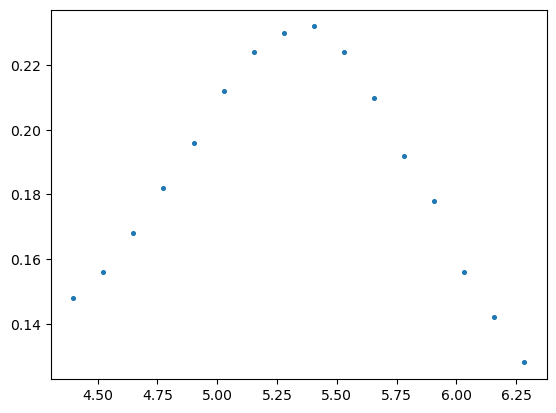

In [4]:
#Pasar a frecuencia angular
X = X/1000
X = 2*np.pi*X

#Pasar a Voltios
Y = Y/1000
Yerr = Yerr/1000

plt.scatter(X, Y, s=7)

In [5]:
def fit(X, A0, gamma, w0):
    return A0/np.sqrt( (w0**2 - X**2)**2 + (gamma*X)**2 )

popt, pcov = curve_fit( fit, X, Y, sigma=Yerr, maxfev = 100000 )

In [6]:
A0 = popt[0]
gamma = popt[1]
w0 = popt[2]

A0err = np.sqrt(pcov[0,0])
gammaerr = np.sqrt(pcov[1,1])
w0err = np.sqrt(pcov[2,2])

print(A0)
print(gamma)
print(w0)

print(A0err)
print(gammaerr)
print(w0err)

1.6977042186060967
-1.3594390827519183
5.426782006463191
0.012731435307101545
0.013095714406346865
0.0038462948952284618


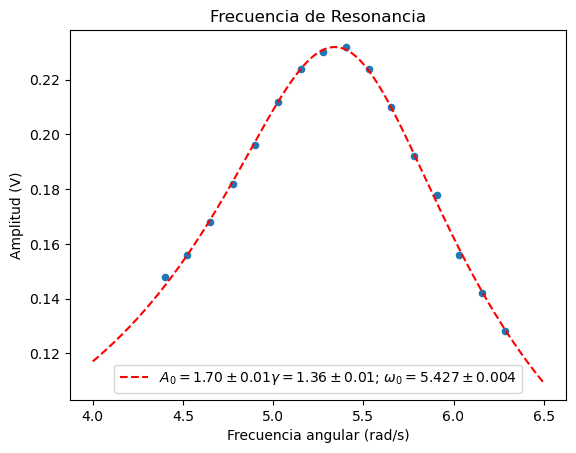

In [7]:
x = np.linspace(4, 6.5, 25001)
y = fit(x, A0, gamma, w0)

plt.plot(x, y, color="red", linestyle="--", label= r"$A_0 = 1.70\pm 0.01$" + r"$\gamma = 1.36\pm 0.01$" + "; " + r"$\omega_0 = 5.427\pm 0.004$")
plt.scatter(X, Y, s=20)

plt.xlabel("Frecuencia angular (rad/s)")
plt.ylabel("Amplitud (V)")
plt.title("Frecuencia de Resonancia")

plt.legend(loc="lower center")

plt.savefig("act5_img1")

In [8]:
Q = np.abs(w0/gamma)


print (Q)

3.9919273142256095


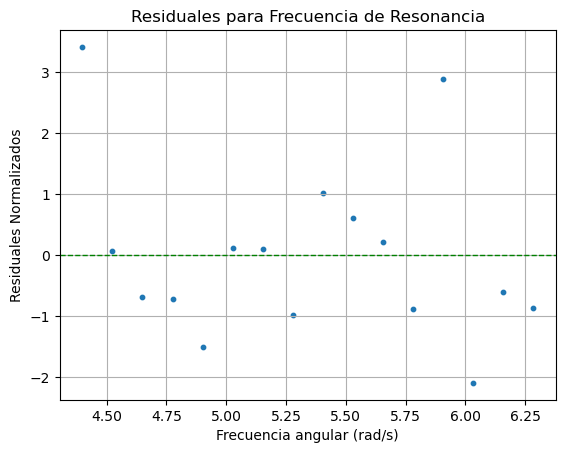

In [9]:
model = fit(X, A0, gamma, w0)
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res, s=10)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_ylabel('Residuales Normalizados')
ax2.set_xlabel('Frecuencia angular (rad/s)')
ax2.set_title('Residuales para Frecuencia de Resonancia')
ax2.grid()

plt.savefig('act5_img1_res.png', format='png')